In [2]:
import os
os.chdir('/home/jovyan/work')
import do_calibration

In [9]:
import gzip

basedir = './inputfiles/testing/converted_fits/'
count=0
result = {}
for filename in os.listdir(basedir):
    if count < 10:
        count=count+1
        with open(basedir+filename, 'rb') as f_in:
            length = len(gzip.compress(f_in.read()))
            result[filename] = length
            print(length)
            
sorted_by_value = sorted(result.items(), key=lambda kv: kv[1], reverse=True)
print(sorted_by_value)

2320601
2284083
2241479
1353554
1233366
1223501
1374003
2241231
2273350
2322380
[('kout000009.fts', 2322380), ('kout000008.fts', 2320601), ('kout000034.fts', 2284083), ('kout000035.fts', 2273350), ('kout000020.fts', 2241479), ('kout000021.fts', 2241231), ('kout000038.png', 1374003), ('kout000039.png', 1353554), ('kout000011.png', 1233366), ('kout000010.png', 1223501)]


In [3]:
import fits2bitmap


In [4]:
basedir = './inputfiles/testing/converted_fits/'
fits2bitmap.fits2bitmap(basedir+'kout000021.fts', scale='log')


ValueError: Format 'fts' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff)

In [5]:
import glob
the_dir = glob.glob(basedir+'*.fts')
the_dir.sort()
#print(the_dir)
#index = the_dir.index('kout000069.fts')
indices = [i for i, elem in enumerate(the_dir) if 'kout000069.fts' in elem]
print(indices)

[62]


In [6]:
import pandas as pd

basedir = './inputfiles/testing/results/lightcurves/'
files = glob.glob(basedir+'*.txt')
#print(files)
result = {}
for file in files:
    df = pd.read_csv(file, skiprows=[1], sep=' ')
    length = len(df.index)
    df = df[df['V-C'] < 99]
    filterlength = len(df.index)
    #print (filterlength/length)
    result[file] = [filterlength, length]
#df.head()   
#print(result)

In [7]:
for key in result:
    if result[key][1] != 93:
        print(key, result[key][1])

./inputfiles/testing/results/lightcurves/curve_08812.txt 92
./inputfiles/testing/results/lightcurves/curve_03001.txt 92


10000 10000
converted values


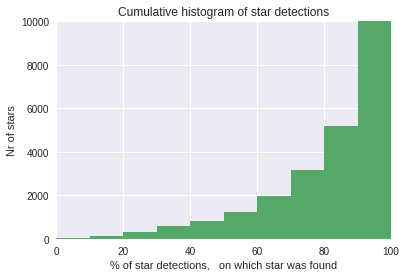

In [44]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

keys = result.keys()
values = list(map(lambda x: x[0]/x[1]*100, result.values()))
print(len(keys), len(values))
print('converted values')
colors = list("rgbcmyk")
sigma = 15 
num_bins = 50
mu = 100  # mean of distribution

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(values, num_bins, density=1)

# add a 'best fit' line
#y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
#     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
#ax.plot(bins, range(1,50), '--')
ax.set_xlabel('% of star detections,   on which star was found')
ax.set_ylabel('Nr of stars')
ax.set_title(r'Cumulative histogram of star detections')
ax.grid(True)
#plt.xticks(np.arange(0, 110, step=10))
major_ticks = np.arange(0, 11000, 2000)
minor_ticks = np.arange(0, 11000, 1000)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
plt.minorticks_on()
plt.xlim(0,100)
plt.ylim(0,10000)
#plt.yticks(np.arange(0, 11000, step=1000))
# Tweak spacing to prevent clipping of ylabel
#fig.tight_layout()
plt.hist(bins=10, x=values, cumulative=1)
plt.show()






In [45]:
fig.savefig('cumul_histo_detections.png')

